In [104]:
import sqlite3
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from pandas import DataFrame

QUERY = """
SELECT o_time, i_qty
FROM orders
GROUP BY o_order_id, o_time
ORDER BY o_order_id
"""

In [105]:
try:
    conn = sqlite3.connect('db/orders_en_GB.db')
    res = conn.execute(QUERY)

    df = DataFrame(res.fetchall())
    df['hour'] = df[0].apply(lambda x: int(x.split(':')[0]))
    df['minute'] = df[0].apply(lambda x: int(x.split(':')[1]))
    df['value'] = df[1].apply(lambda x: float(x))
    del df[0]
    del df[1]
    print(df)
finally:
    if conn:
        conn.close()

    hour  minute  value
0     20      42    1.0
1      0      26    2.0
2     11      21    3.0
3     12       7    2.0
4     14      49    2.0
5     15       6    2.0
6     16       9    6.0
7     16      33    1.0
8     16      43    2.0
9     18       8    1.0
10    19       3    2.0
11    19      28    5.0
12    20      53    3.0


In [106]:
pt = df.pivot_table(index='minute', columns='hour', values='value', aggfunc='sum').fillna(0)
print(pt)

hour     0    11   12   14   15   16   18   19   20
minute                                             
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0
6       0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0
7       0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0
8       0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
9       0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0
21      0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
26      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
28      0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0
33      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
42      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
43      0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0
49      0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0
53      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0


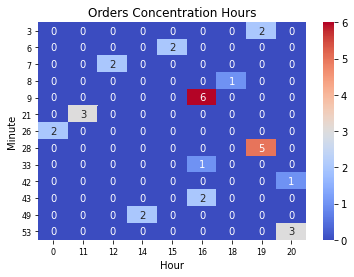

In [107]:
hm = sb.heatmap(pt, annot=True, cmap="coolwarm")
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=8)
hm.set_xticklabels(hm.get_xticklabels(), rotation=0, fontsize=8)

plt.title('Orders Concentration Hours')
plt.ylabel('Minute')
plt.xlabel('Hour')
plt.grid(False)